## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:

from keras.layers import BatchNormalization
# Disable GPU
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [2, 16, 32, 128, 256 ]
MOMENTUM = 0.95

In [9]:
results = {}
for batch in BATCH_SIZE:
    keras.backend.clear_session()
    print("Experiment with Batch = %.6f" % (batch))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer=optimizer)
    
    model.fit(x_train,y_train,epochs=EPOCHS,batch_size=batch,validation_data=(x_test,y_test),shuffle=True)
    
     # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-batch-%s" % str(batch)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}



Experiment with Batch = 2.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)   

50000/50000 [==============================] - 280s 6ms/step - loss: 2.2481 - acc: 0.1620 - val_loss: 3.4117 - val_acc: 0.1980
Epoch 50/50
50000/50000 [==============================] - 282s 6ms/step - loss: 2.2519 - acc: 0.1594 - val_loss: 3.3594 - val_acc: 0.2058
Experiment with Batch = 16.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)

50000/50000 [==============================] - 40s 796us/step - loss: 1.1089 - acc: 0.6088 - val_loss: 1.3873 - val_acc: 0.5127
Epoch 48/50
50000/50000 [==============================] - 40s 802us/step - loss: 1.0994 - acc: 0.6119 - val_loss: 1.3406 - val_acc: 0.5315
Epoch 49/50
50000/50000 [==============================] - 41s 811us/step - loss: 1.1019 - acc: 0.6088 - val_loss: 1.3699 - val_acc: 0.5219
Epoch 50/50
50000/50000 [==============================] - 40s 809us/step - loss: 1.1139 - acc: 0.6051 - val_loss: 1.3979 - val_acc: 0.5147
Experiment with Batch = 32.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 

50000/50000 [==============================] - 27s 547us/step - loss: 0.8335 - acc: 0.7018 - val_loss: 1.5453 - val_acc: 0.5112
Epoch 46/50
50000/50000 [==============================] - 27s 549us/step - loss: 0.8204 - acc: 0.7088 - val_loss: 1.5751 - val_acc: 0.4984
Epoch 47/50
50000/50000 [==============================] - 28s 551us/step - loss: 0.8091 - acc: 0.7082 - val_loss: 1.6258 - val_acc: 0.4891
Epoch 48/50
50000/50000 [==============================] - 28s 551us/step - loss: 0.8019 - acc: 0.7147 - val_loss: 1.5281 - val_acc: 0.5086
Epoch 49/50
50000/50000 [==============================] - 27s 549us/step - loss: 0.8035 - acc: 0.7132 - val_loss: 1.6088 - val_acc: 0.5027
Epoch 50/50
50000/50000 [==============================] - 28s 552us/step - loss: 0.8041 - acc: 0.7139 - val_loss: 1.5565 - val_acc: 0.5091
Experiment with Batch = 128.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input

50000/50000 [==============================] - 12s 247us/step - loss: 0.3540 - acc: 0.8786 - val_loss: 2.3532 - val_acc: 0.4683
Epoch 44/50
50000/50000 [==============================] - 12s 246us/step - loss: 0.3428 - acc: 0.8832 - val_loss: 2.3340 - val_acc: 0.4652
Epoch 45/50
50000/50000 [==============================] - 12s 243us/step - loss: 0.3317 - acc: 0.8864 - val_loss: 2.3681 - val_acc: 0.4714
Epoch 46/50
50000/50000 [==============================] - 12s 246us/step - loss: 0.3230 - acc: 0.8887 - val_loss: 2.4216 - val_acc: 0.4618
Epoch 47/50
50000/50000 [==============================] - 12s 250us/step - loss: 0.3099 - acc: 0.8941 - val_loss: 2.4036 - val_acc: 0.4494
Epoch 48/50
50000/50000 [==============================] - 12s 246us/step - loss: 0.2988 - acc: 0.8968 - val_loss: 2.5276 - val_acc: 0.4382
Epoch 49/50
50000/50000 [==============================] - 13s 252us/step - loss: 0.2985 - acc: 0.8967 - val_loss: 2.5151 - val_acc: 0.4552
Epoch 50/50
50000/50000 [=======

50000/50000 [==============================] - 8s 168us/step - loss: 0.2755 - acc: 0.9186 - val_loss: 2.1674 - val_acc: 0.4694
Epoch 42/50
50000/50000 [==============================] - 9s 174us/step - loss: 0.2663 - acc: 0.9204 - val_loss: 2.2363 - val_acc: 0.4688
Epoch 43/50
50000/50000 [==============================] - 8s 168us/step - loss: 0.2451 - acc: 0.9294 - val_loss: 2.2963 - val_acc: 0.4641
Epoch 44/50
50000/50000 [==============================] - 9s 171us/step - loss: 0.2333 - acc: 0.9318 - val_loss: 2.2781 - val_acc: 0.4722
Epoch 45/50
50000/50000 [==============================] - 9s 172us/step - loss: 0.2272 - acc: 0.9345 - val_loss: 2.3647 - val_acc: 0.4656
Epoch 46/50
50000/50000 [==============================] - 9s 172us/step - loss: 0.2213 - acc: 0.9352 - val_loss: 2.3390 - val_acc: 0.4744
Epoch 47/50
50000/50000 [==============================] - 9s 173us/step - loss: 0.2061 - acc: 0.9419 - val_loss: 2.3651 - val_acc: 0.4664
Epoch 48/50
50000/50000 [==============

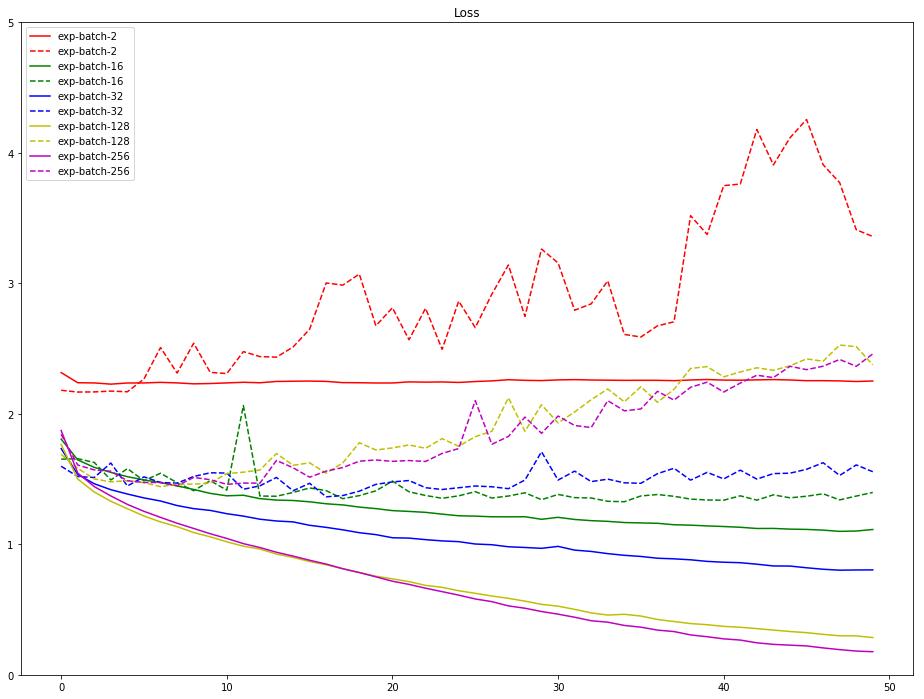

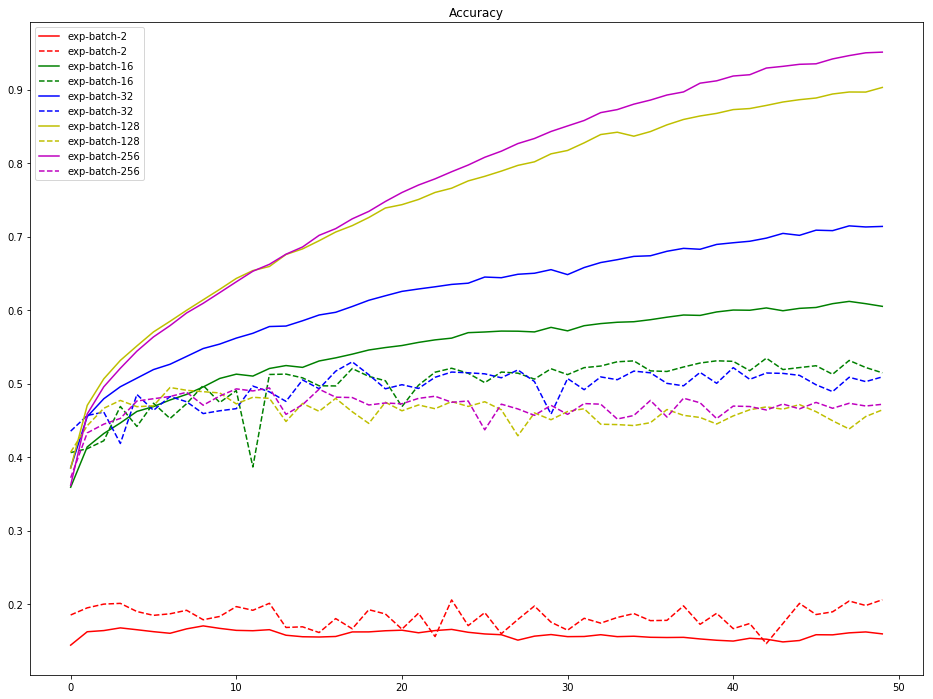

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m"]

plt.figure(figsize=(16,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(16,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()